<a href="https://colab.research.google.com/github/AlexJurcich/Machine-learning/blob/main/Credit_Card_Marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Data Science Project**

## Alex Jurcich

## **Objective**

Our objective is to leverage credit card user data to identify customized marketing opportunities. We will employ cluster analysis to segment customers, enabling us to make informed decisions on the most effective marketing strategies based on the resulting customer profiles.

## **Import Libraries & Data**

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data
df = pd.read_csv('Marketing_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## **Preprocessing**

In [3]:
# Overview of the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Look at the data we see that all of our data in **continuous** with `CUST_ID` being the primary key in the dataset

In [4]:
# Summary of data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Looking at the **min** & **max** of each variable we don't notice any extreme values at first glance, however outliers may still be present along with **NA** **values**.

In [5]:
# Explore Customer with one off purchase value of $40761.25
df[df['ONEOFF_PURCHASES'] == 40761.250000]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


While this customer accounted for a lot of the max values they did not account for all of them.

At first glance we notice that this customer makes a lot of **frequent purchases** and **one off purchases**. However they don't use **cash advnace**. If our comapny were to launch a targetting marketing campaign about cash advnace it wouldn't make sense to target them.

In [6]:
# Explore Customer with cash advanced value of $47137.21
df[df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


Comparing these two customers we see differences in how customer **C10574** uses a lot of frequent purchases and one off purchases and hardly no Cash Advances.

Where customer **C12226** uses a lot of Cash Advances and hardly any frequent purchases and one off purchases.

Looking ahead we could be able to cluster customers with simular patterns to discover insights and make teh best possible marketign strategy based on the results

## **EDA**

In [7]:
# Sum the missing values
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


We see we haev **313** missing Minimum Payment value, and **1** missing credit limit value. In order to decide how to fill the missing data points we can look at the proportion of the missing data points respective to the entire data set.

In [8]:
# Missing NA proportions
round(df[df['MINIMUM_PAYMENTS'].isnull()].shape[0] / df.shape[0], 2)

0.03

Since we are only missing 3% of the data we can fill the missing in with the average value for **minimum payments** which is 864.206542. We will do the same for the single missing credit limit data point as well.

In [9]:
# Fill Minimum payemnts NA's with mean value
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

# Quality Check
print(df['MINIMUM_PAYMENTS'].isnull().sum())

0


In [10]:
# Fill Credit limit NA with mean value
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

# Quality Check
print(df['CREDIT_LIMIT'].isna().sum())

0


Now that we have no more NA values we can check for duplicates in our dataset.

In [11]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

Our data set is now clean. We checked and adjusted for:


*   Extreme values
*   Missing values
*   Duplicates


We can now move on to exploring the features in our dataset



The first step is to remove the **ID column** as it has no meaning in a cluster analysis

In [12]:
# Drop ID column
df.drop('CUST_ID', axis = 1, inplace = True)

Now we can visualize all of our features using kde plot, to better understadn the distributions of features

In [13]:
# Number of columns
df.shape[1]

17

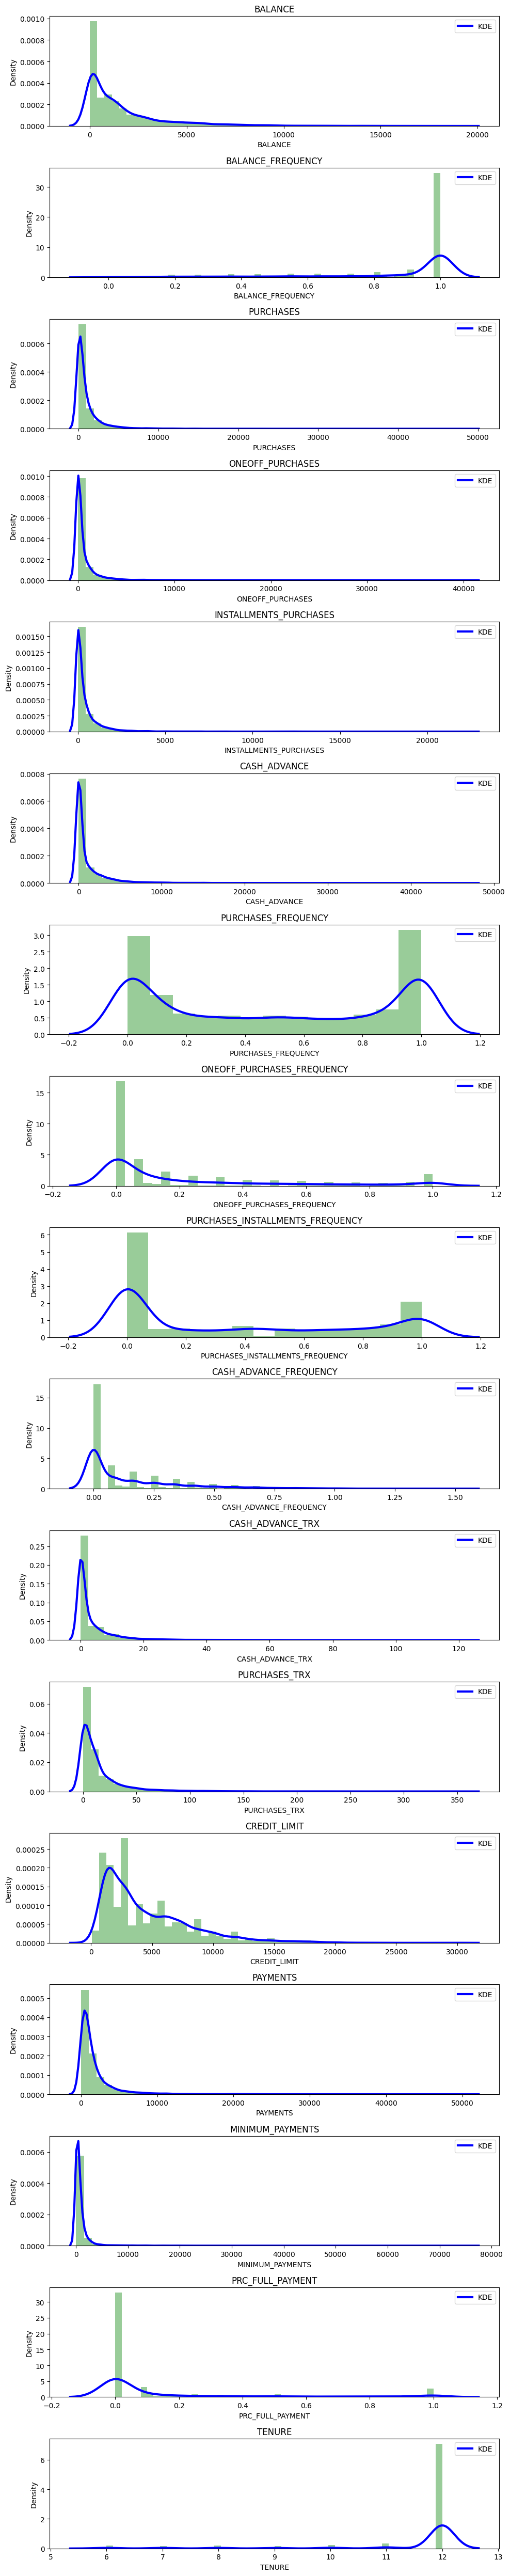

In [14]:
# Distribution Plots
plt.figure(figsize=(10, 50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'KDE'},
                                           hist_kws={'color': 'g'})
  plt.title(df.columns[i])
  plt.legend()
plt.tight_layout()
plt.show()

From the density plots we see that there are clear outliers in our dataset. But for the most part most of the customers follow a simular trend (one cluster).

However looking at Purchase Frequency and Purchases Installment Frequency the data is more spread and most customers are in two groups (two clusters: 0 and 1)

We can now plot the correlatiosn between the correlations between the features

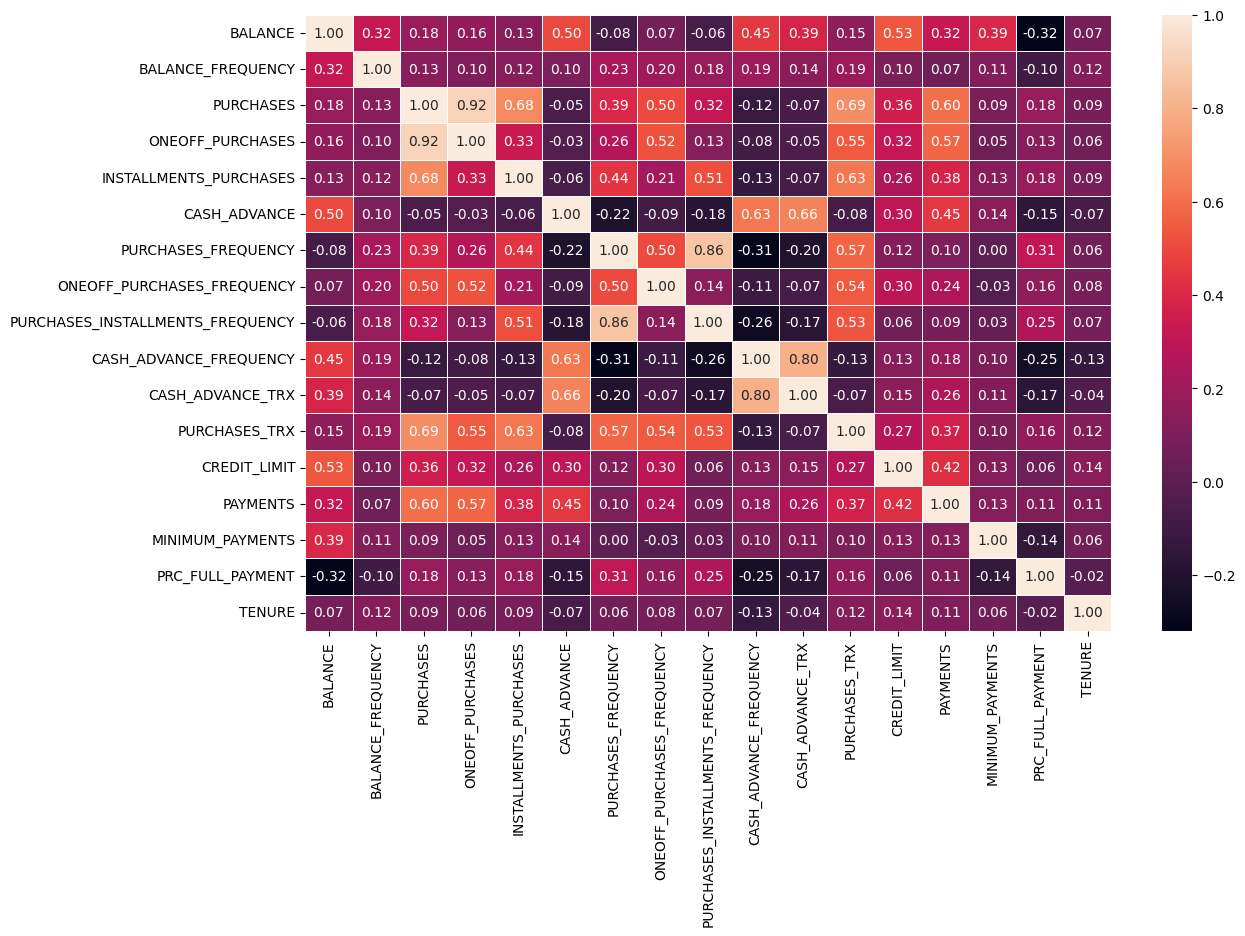

In [15]:
# Correlation Heatmap
f, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

We notice that **Purchases** have a high correlation between **one-off purchases**, **installment purchases**, **purchase transactions**, **credit limit**, and **payments**.

Furthermore we have a strong correlation between **Purchase Frequency** and **Purchase Installment Frequency**

## **KMeans Method**

### **Finding Number of Clusters**

To find the optimal number of clusters we will use the elbow method.

Finding the optimal number of clusters for K-Means is crucial for ensuring that the resulting groupings are both meaningful and actionable. An inappropriate number of clusters can lead to oversimplification or overfitting,

In [16]:
# Scale Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Preview
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

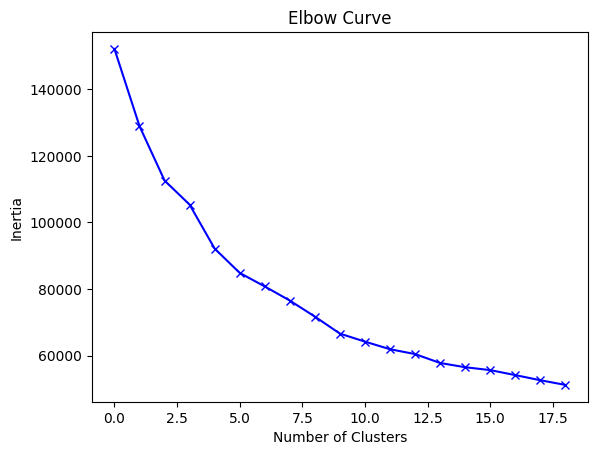

In [17]:
# Find Optimal Number of Clusters using Elbow Method
inertia = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


From the curve we see that the elbow forms around clusters 7-9. Anyone of these values could work, so we will chosse 8 to be the number of clusters.

### **Apply KMeans**

In [18]:
# KMeans with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Quality check
kmeans.cluster_centers_.shape

(8, 17)

In [19]:
# Store cluster centroids
clsuter_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)

# Preview
clsuter_centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2.058233,0.380125,-0.008668,-0.018266,0.012715,3.443464,-0.166359,0.000556,-0.114164,2.464589,3.214804,0.038914,1.388970,2.012618,0.571945,-0.287571,0.036356
1,-0.697312,-2.143216,-0.315217,-0.234345,-0.314691,-0.311810,-0.559017,-0.424876,-0.459982,-0.483072,-0.366196,-0.425994,-0.210357,-0.226025,-0.255247,0.264202,-0.176963
2,-0.423285,0.306369,-0.059228,-0.245620,0.311194,-0.377428,1.006329,-0.378927,1.188022,-0.481567,-0.370117,0.137881,-0.332000,-0.254585,-0.127285,0.402403,-0.042480
3,0.930844,0.337142,-0.339787,-0.243746,-0.355650,0.950975,-0.732450,-0.361609,-0.635260,1.445542,0.994548,-0.430999,0.394792,0.086235,0.159508,-0.431688,-0.283473
4,1.374491,0.412070,7.177493,6.384202,5.239545,0.016050,1.082454,1.917512,1.031769,-0.290144,-0.107898,4.786628,2.181050,4.962364,0.709040,0.864673,0.332658
5,0.164517,0.429473,0.940910,0.887776,0.593733,-0.297602,1.099708,1.847568,0.564352,-0.393199,-0.307858,1.198653,0.719818,0.392337,-0.040770,0.432402,0.276054
6,1.210379,0.466916,0.002326,-0.286478,0.530986,-0.040978,0.064311,-0.558459,0.305943,-0.260594,-0.091820,0.196738,-0.058635,-0.083957,10.408907,-0.525551,0.294258
7,-0.136799,0.373512,-0.320844,-0.201091,-0.389067,-0.233015,-0.739663,-0.281685,-0.722615,-0.134223,-0.197983,-0.443459,-0.397414,-0.294149,-0.092992,-0.445219,0.100819


In [20]:
# Concat the clusters to the original dataframe
df_clustered = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)

# Preview
df_clustered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


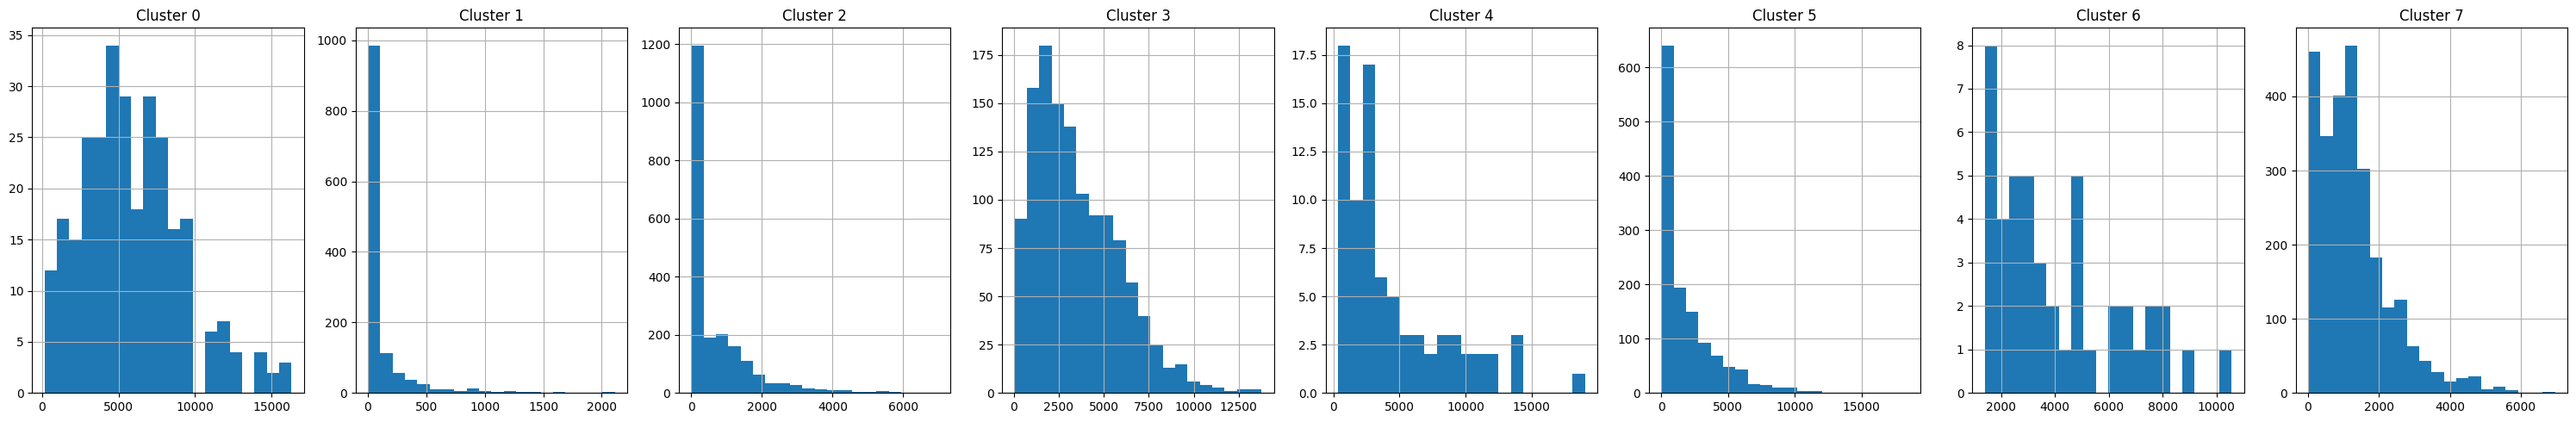

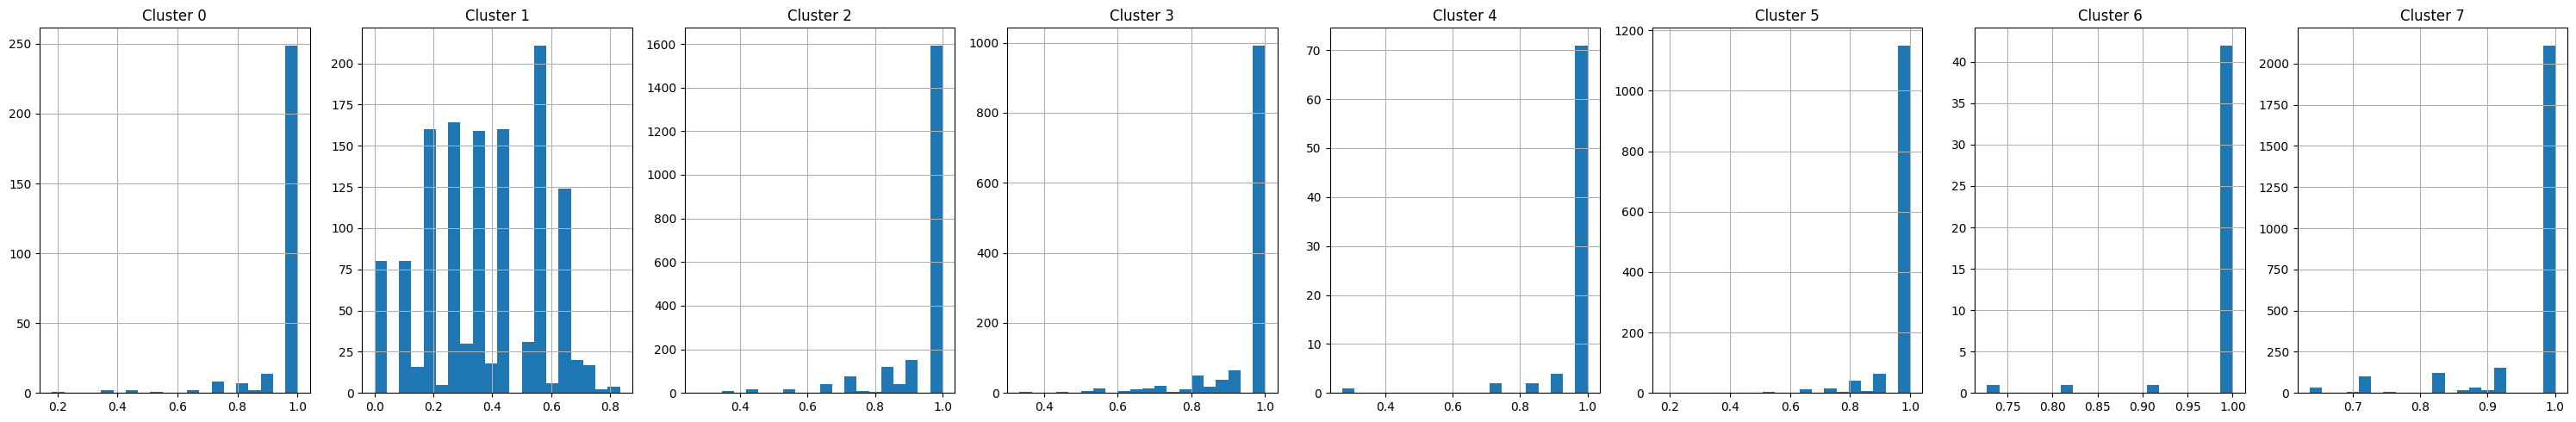

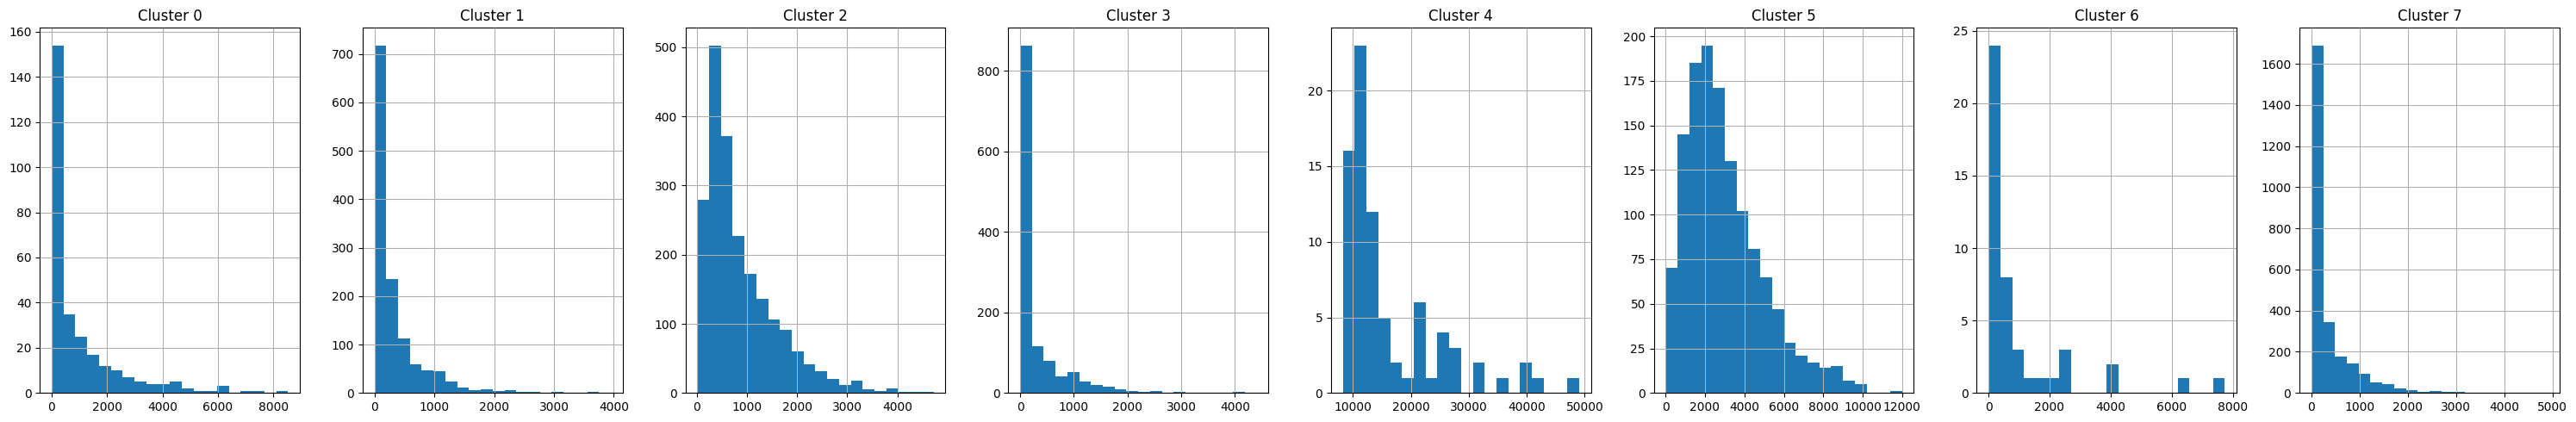

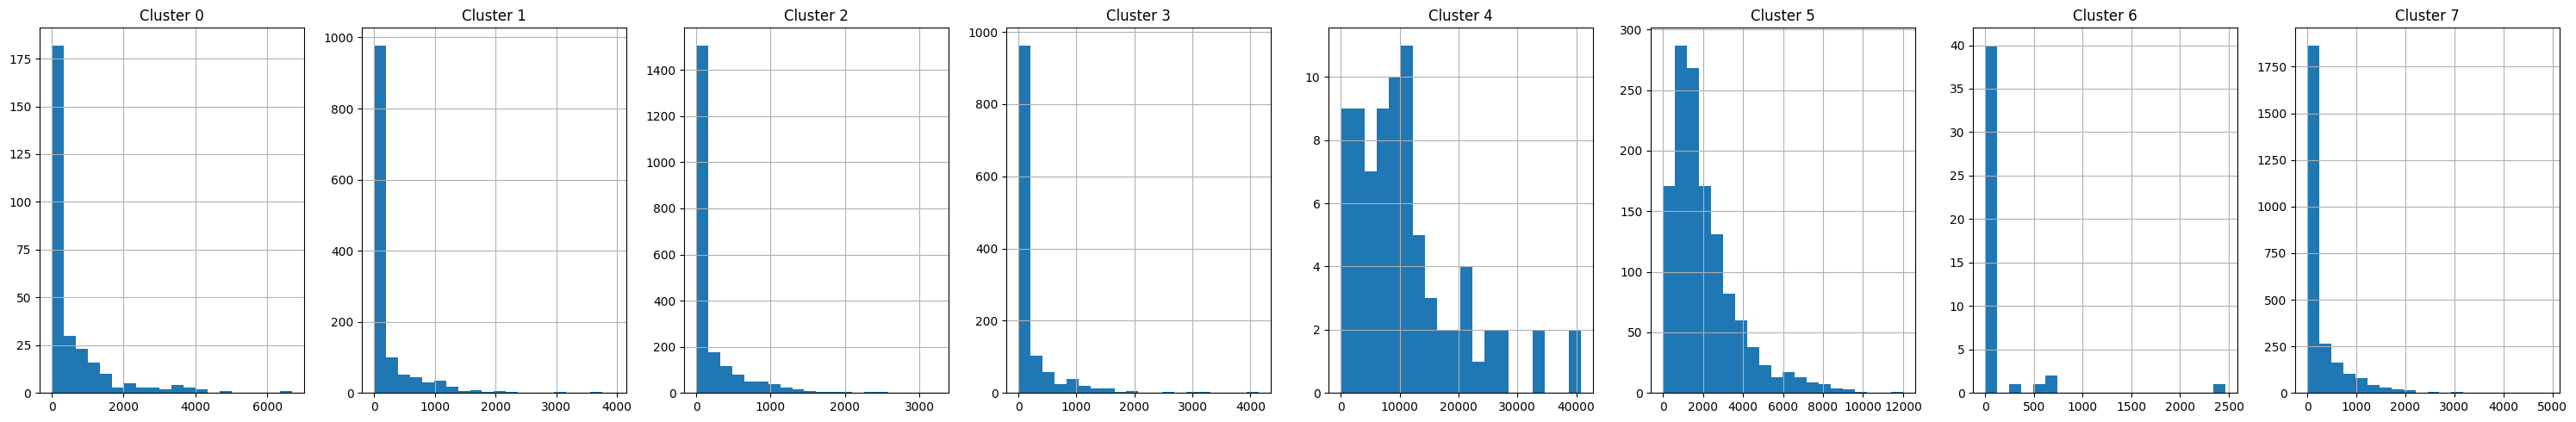

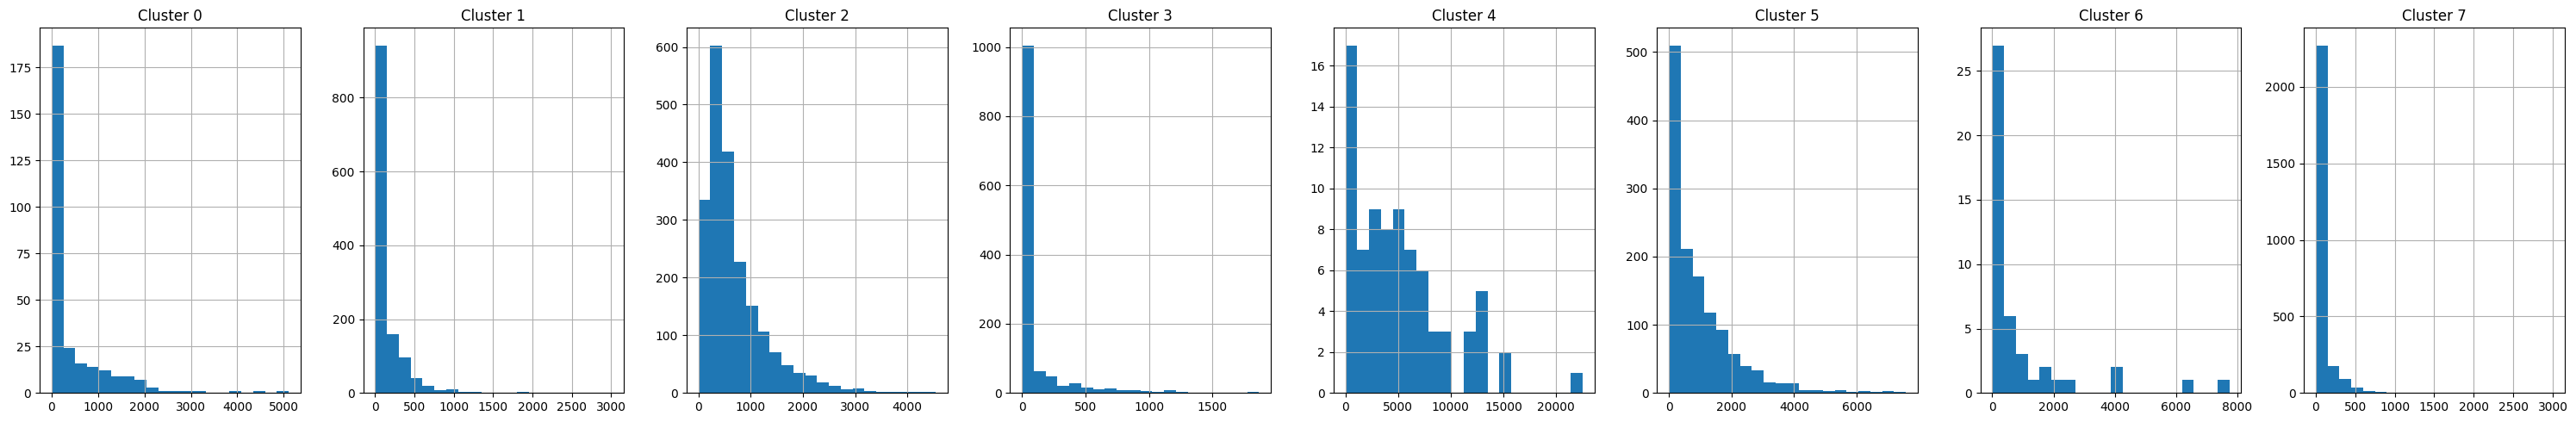

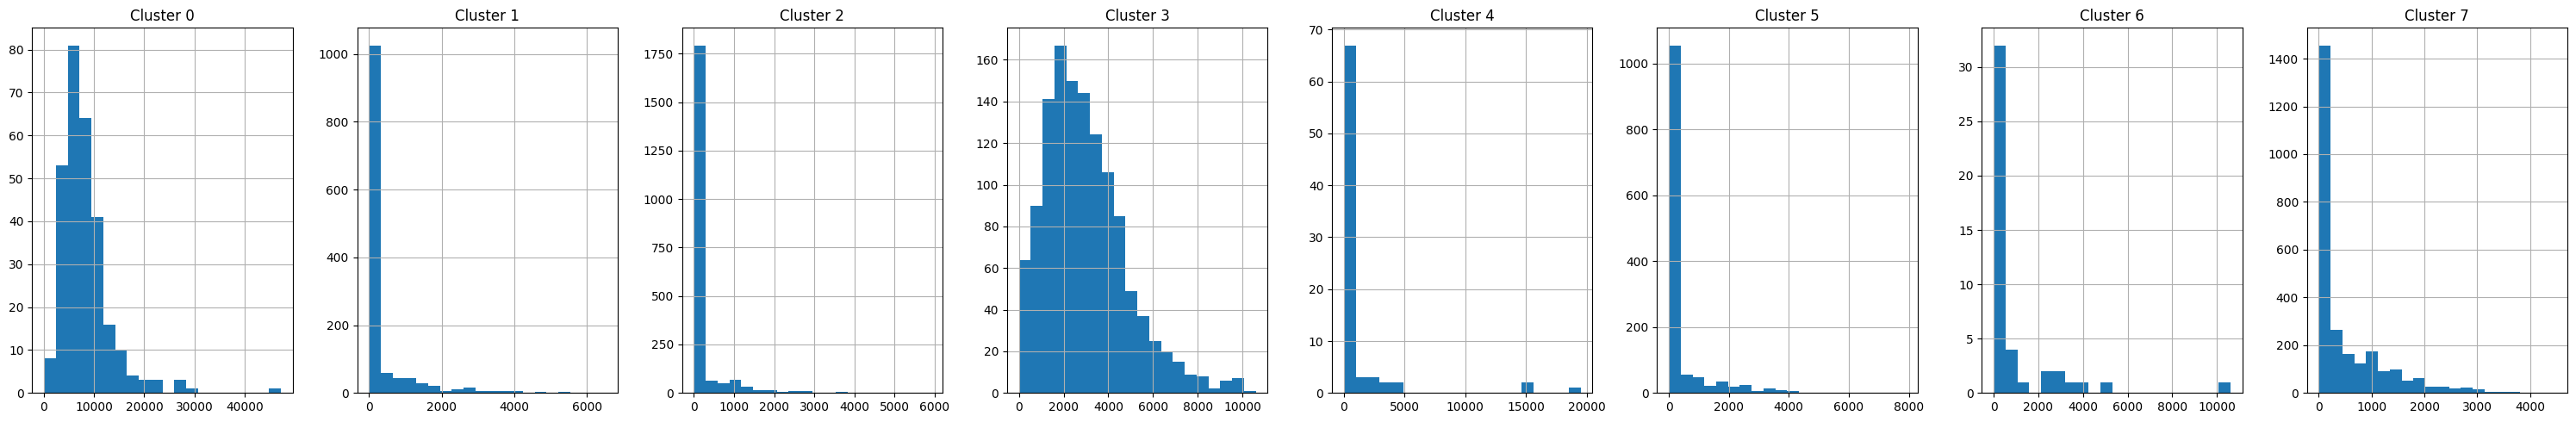

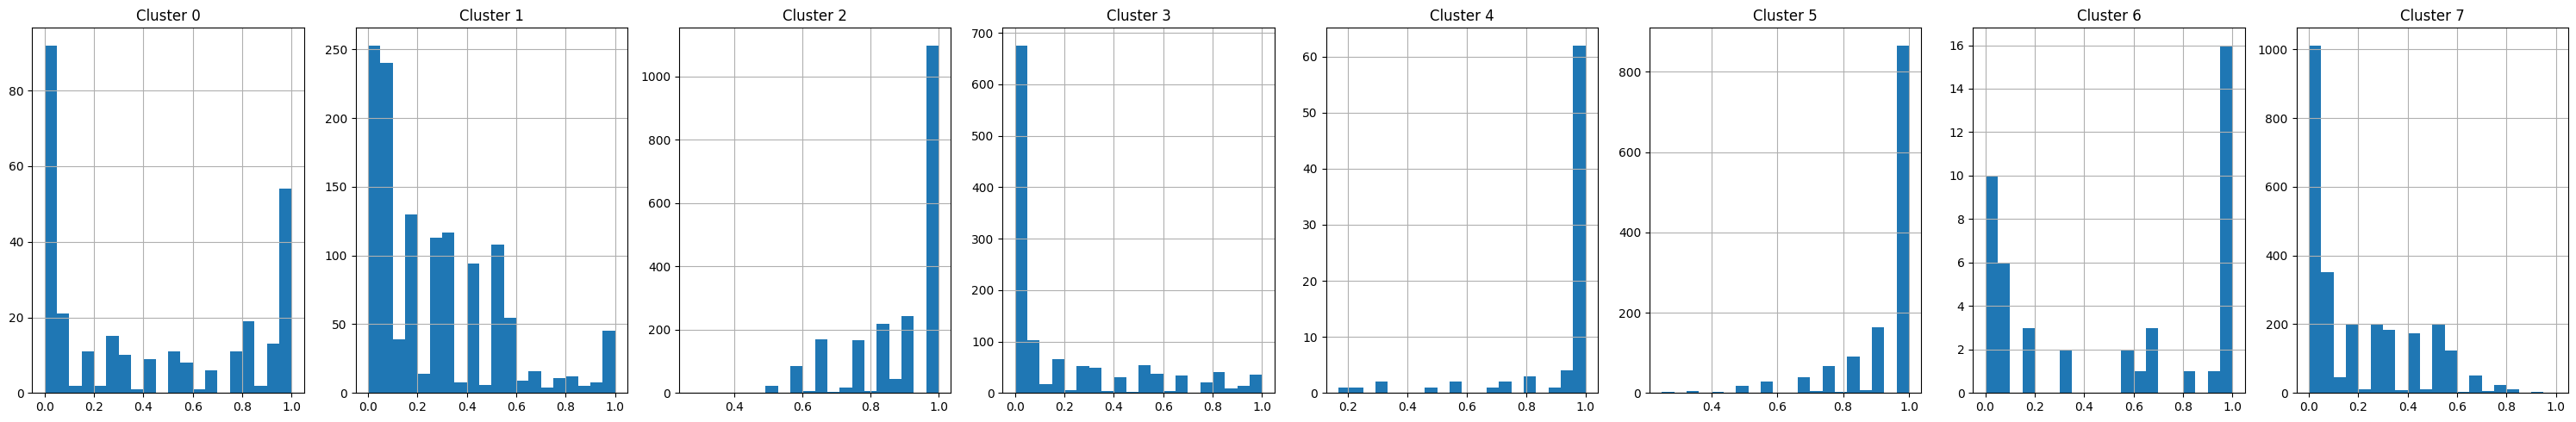

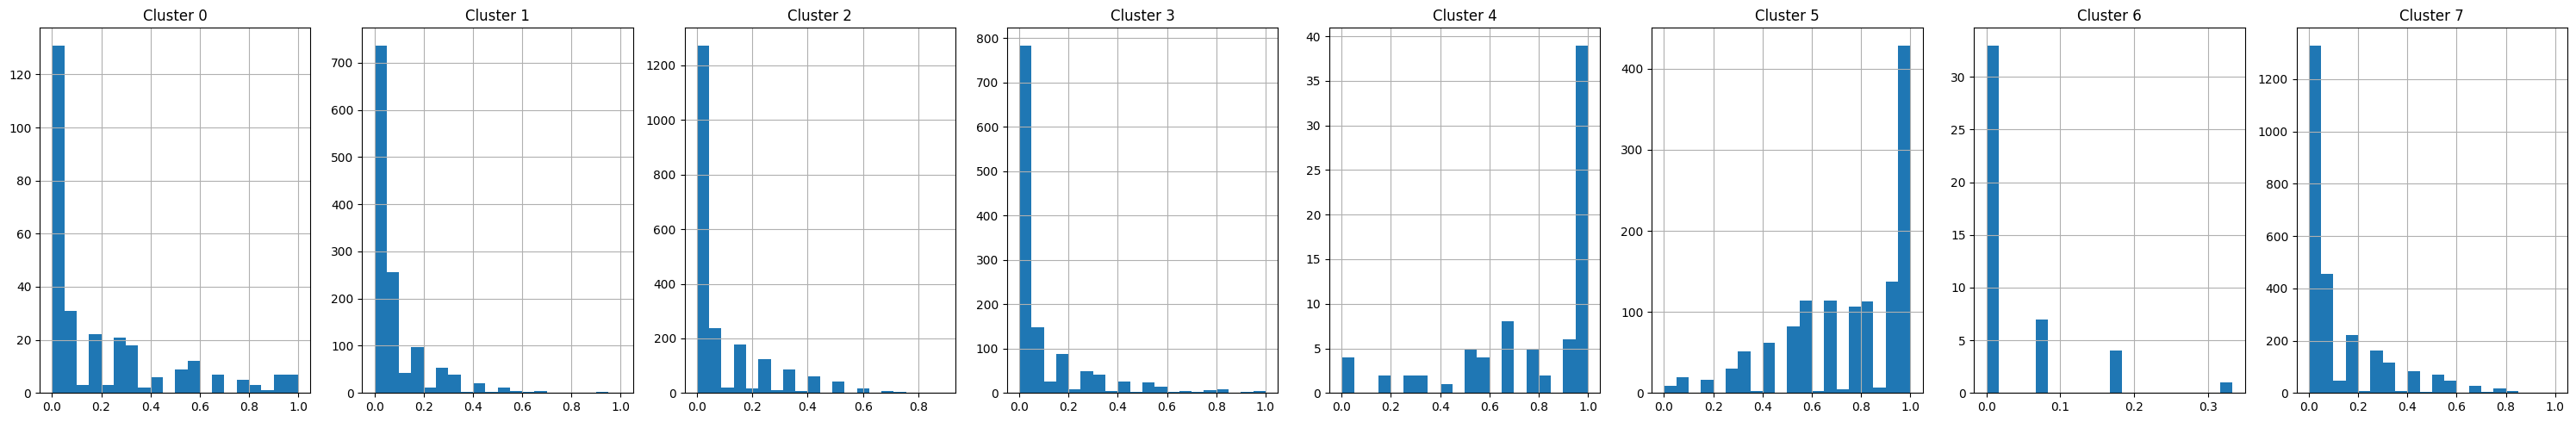

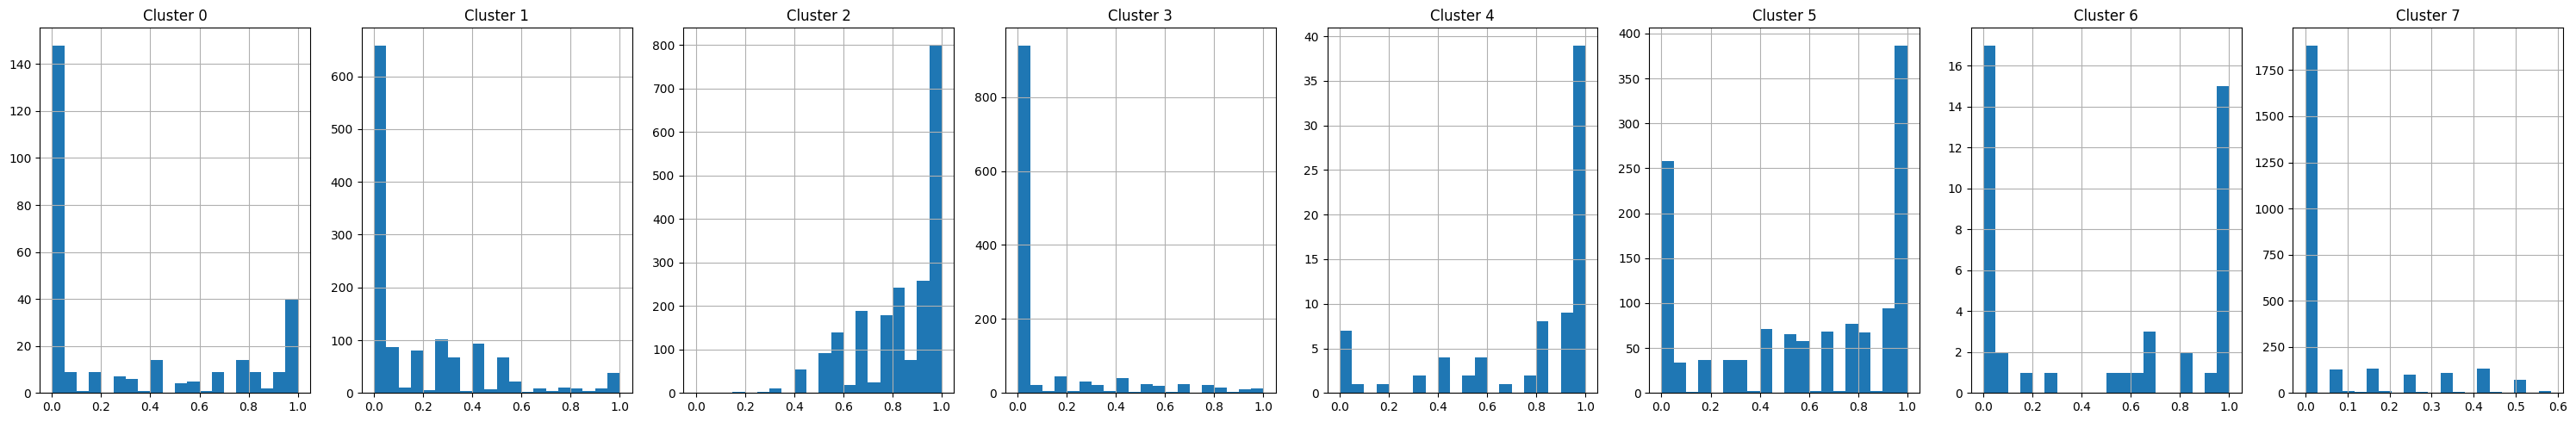

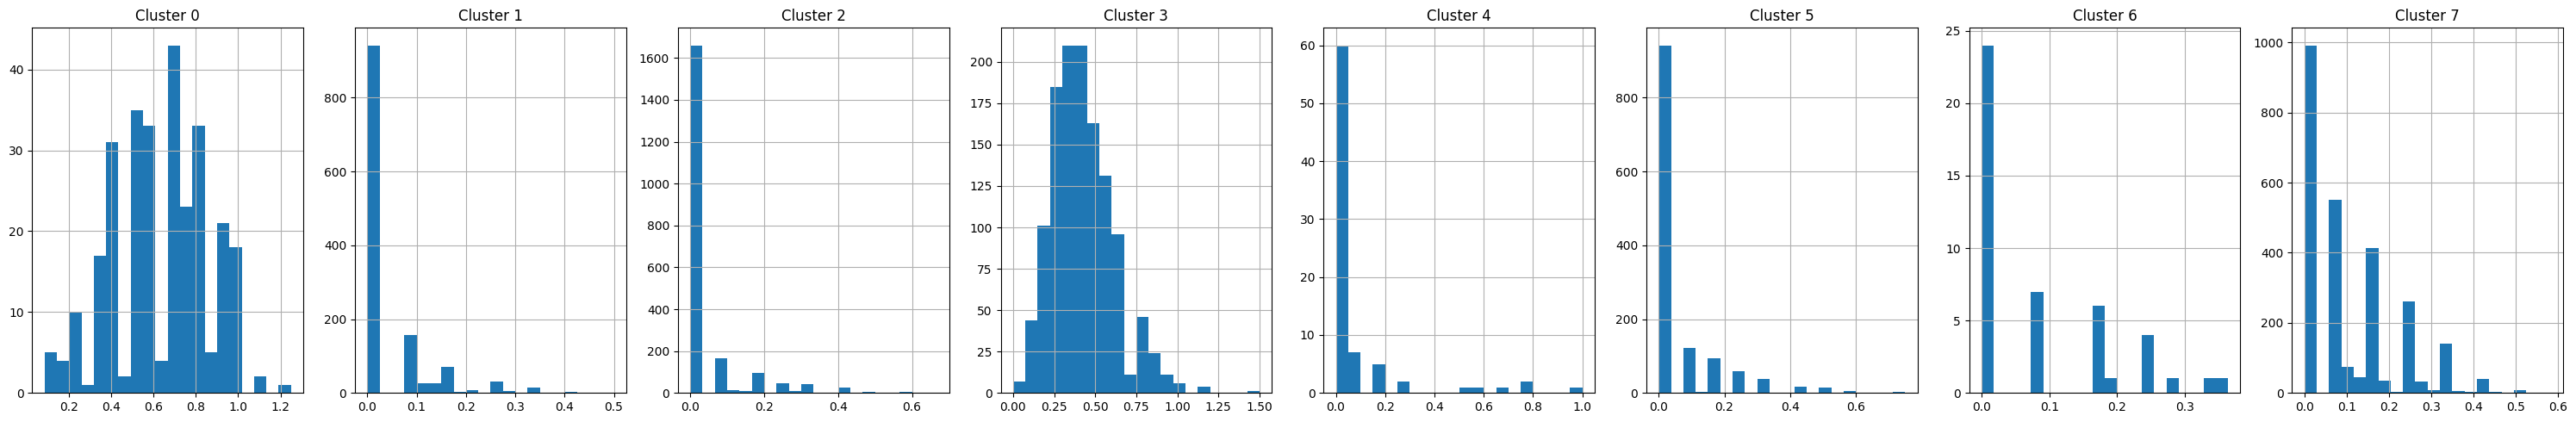

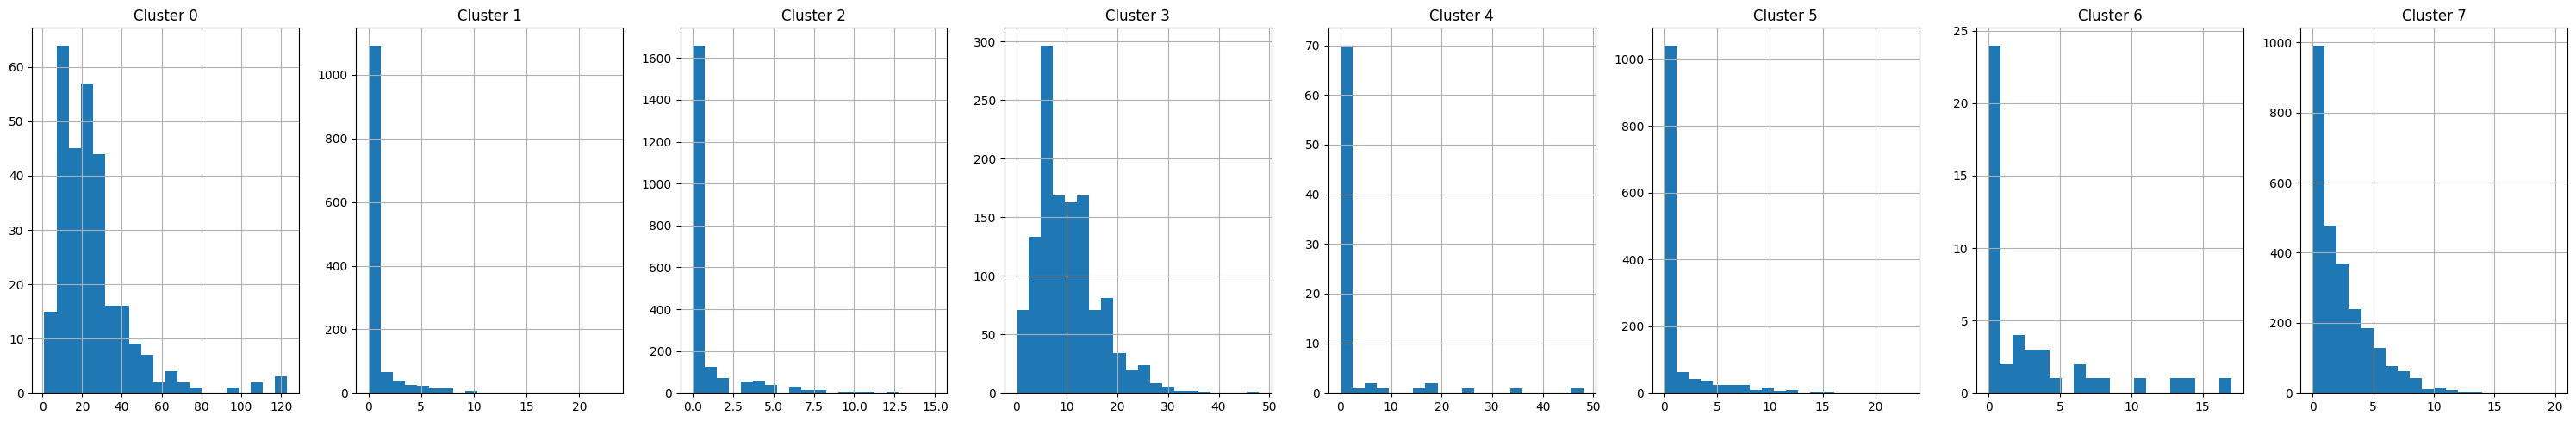

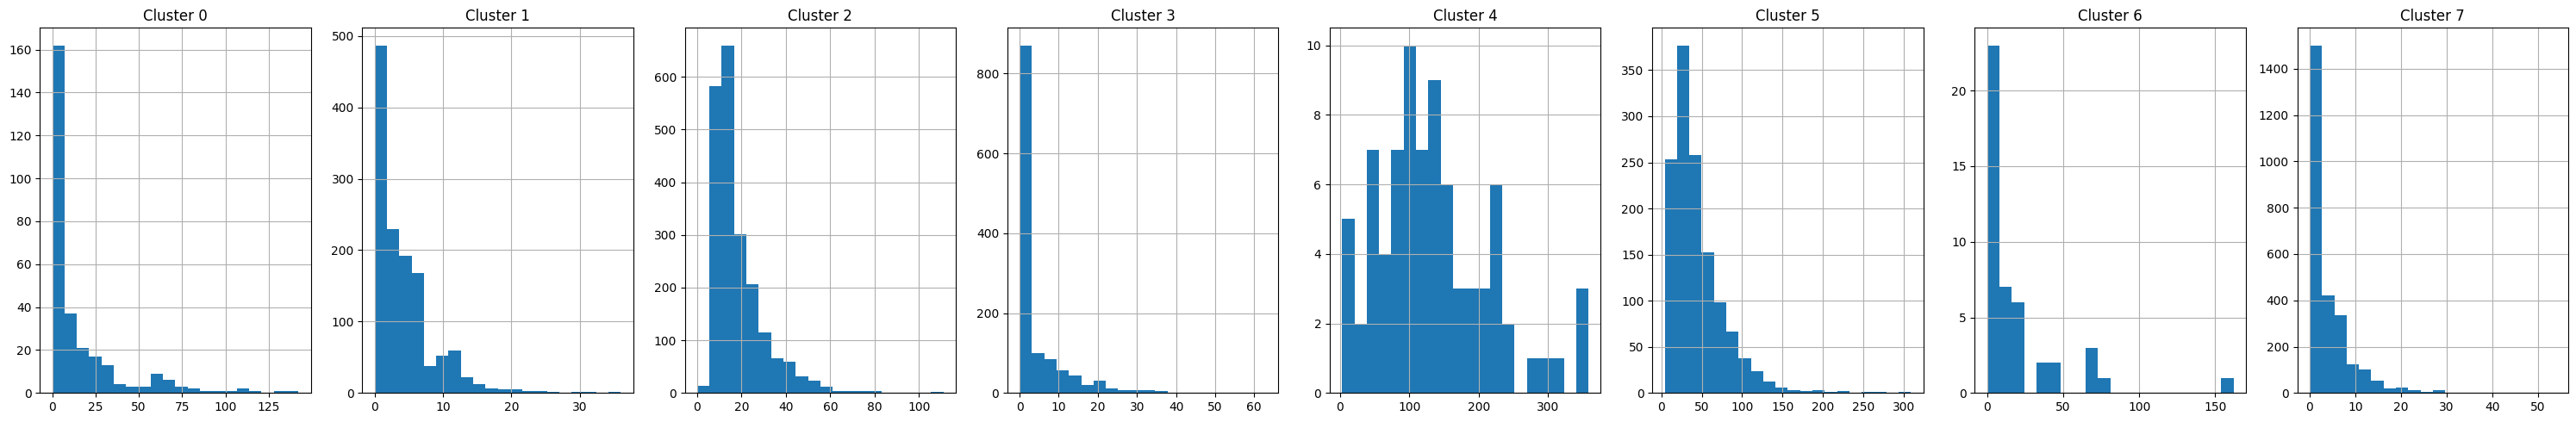

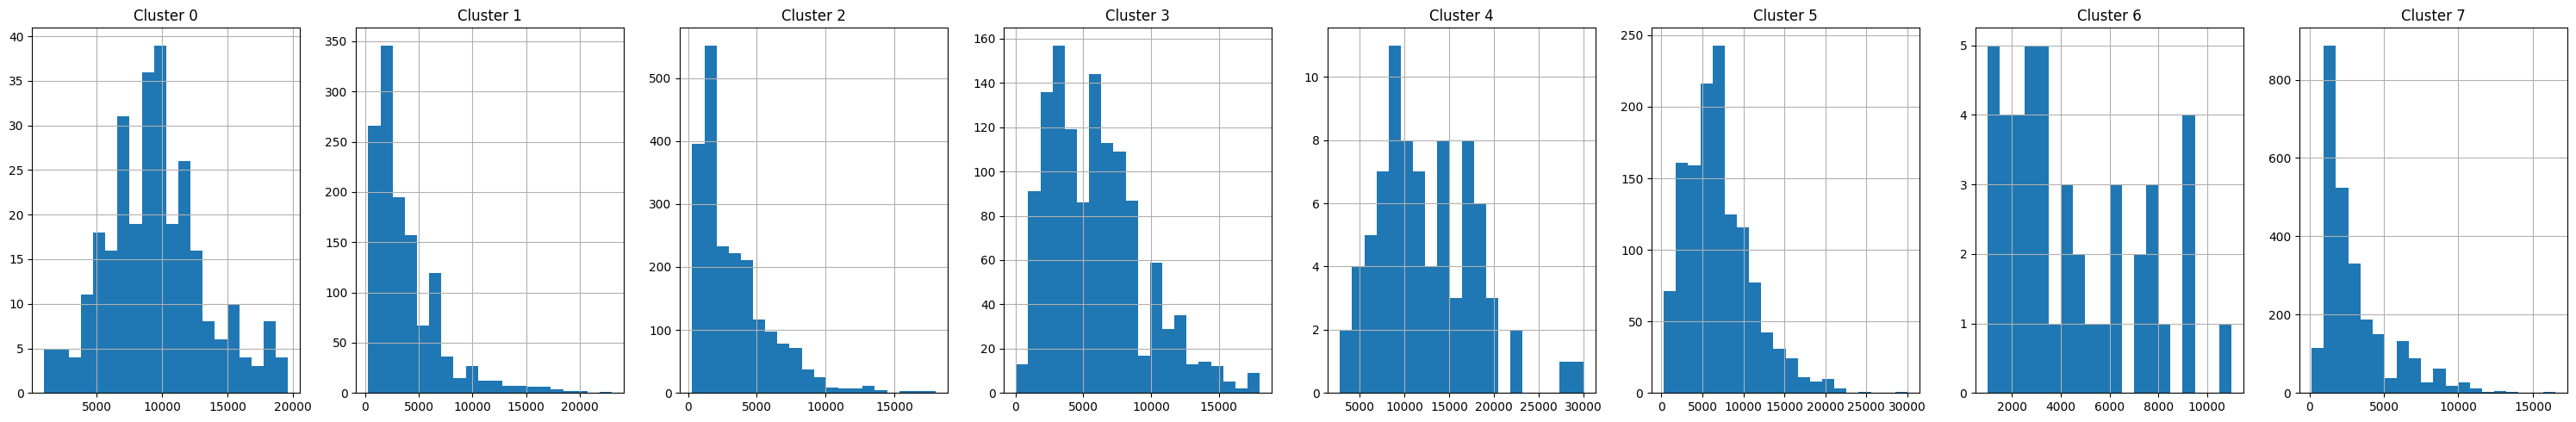

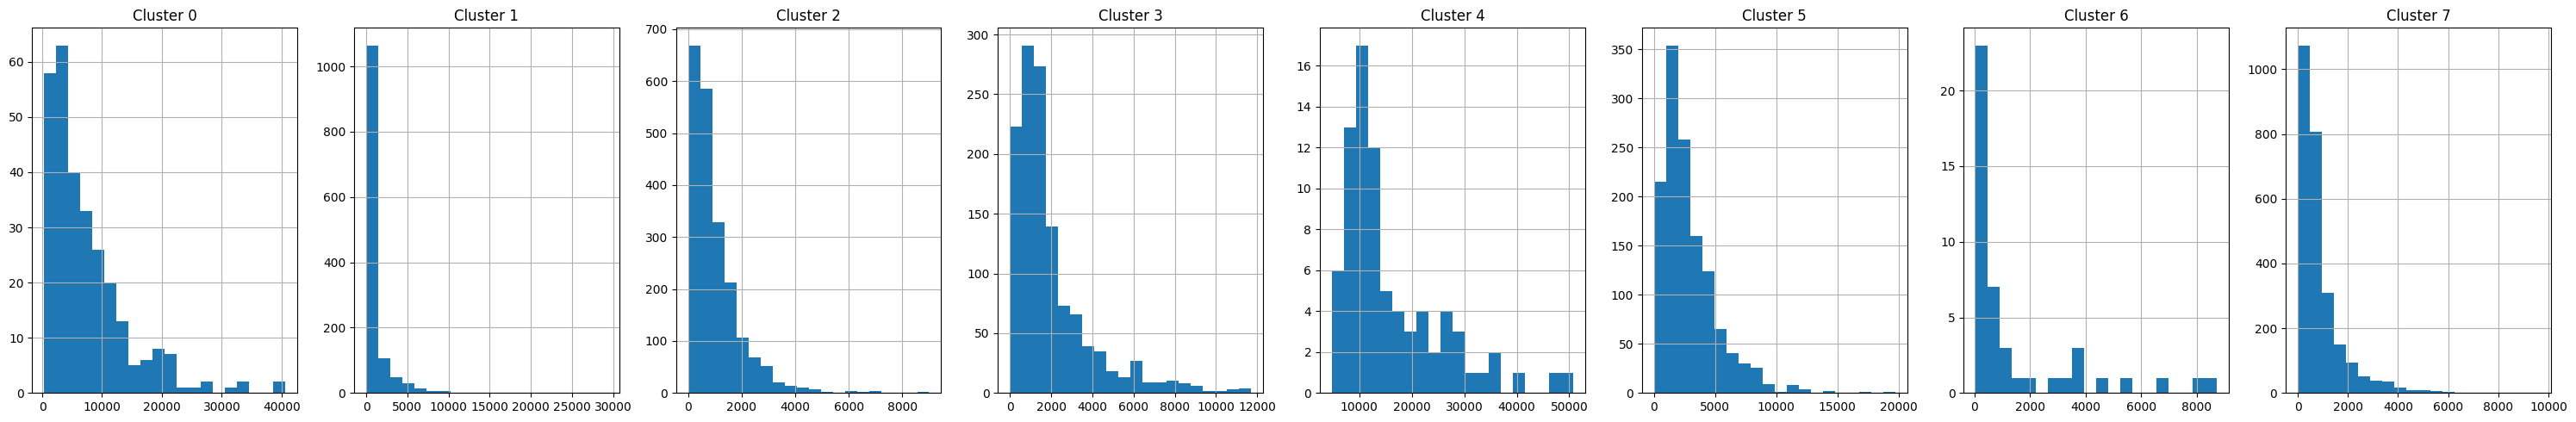

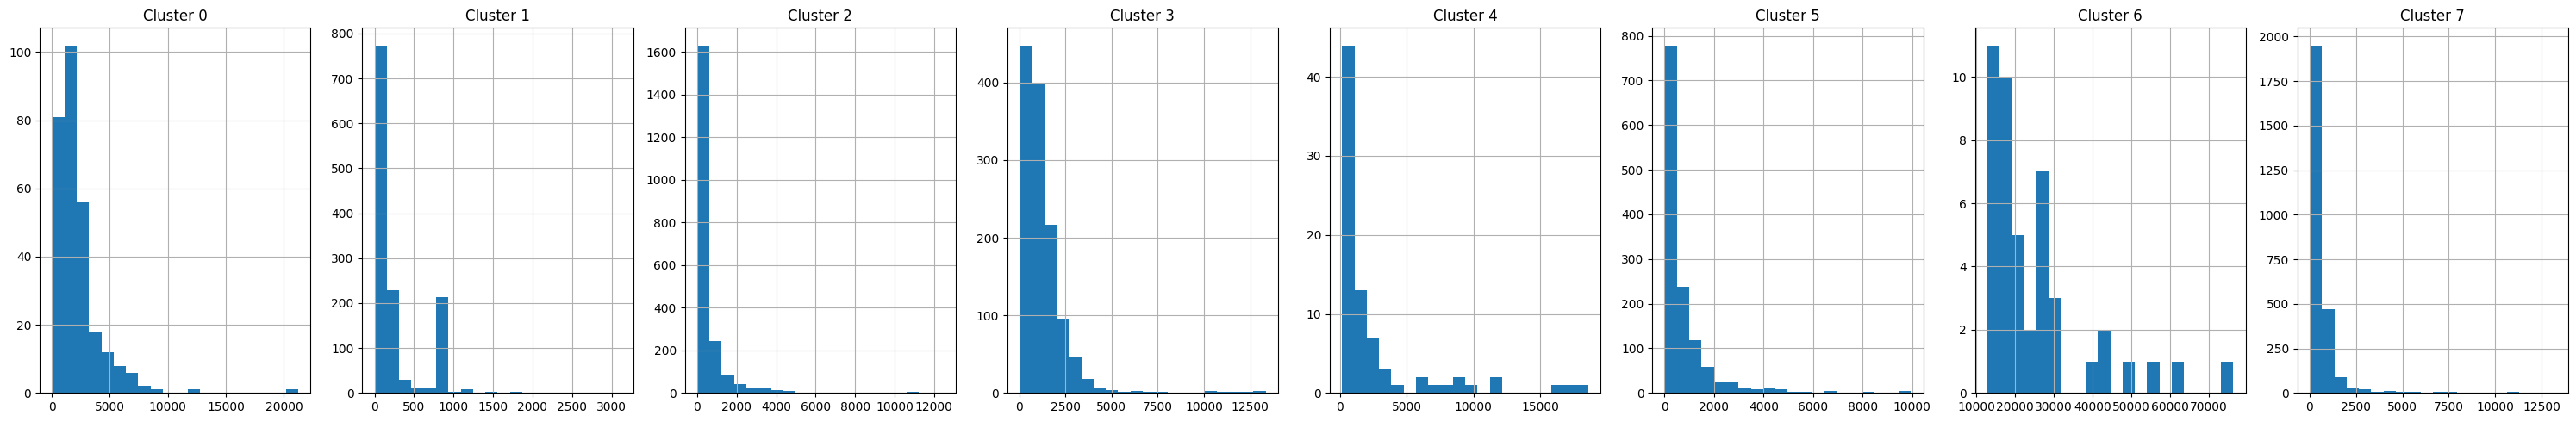

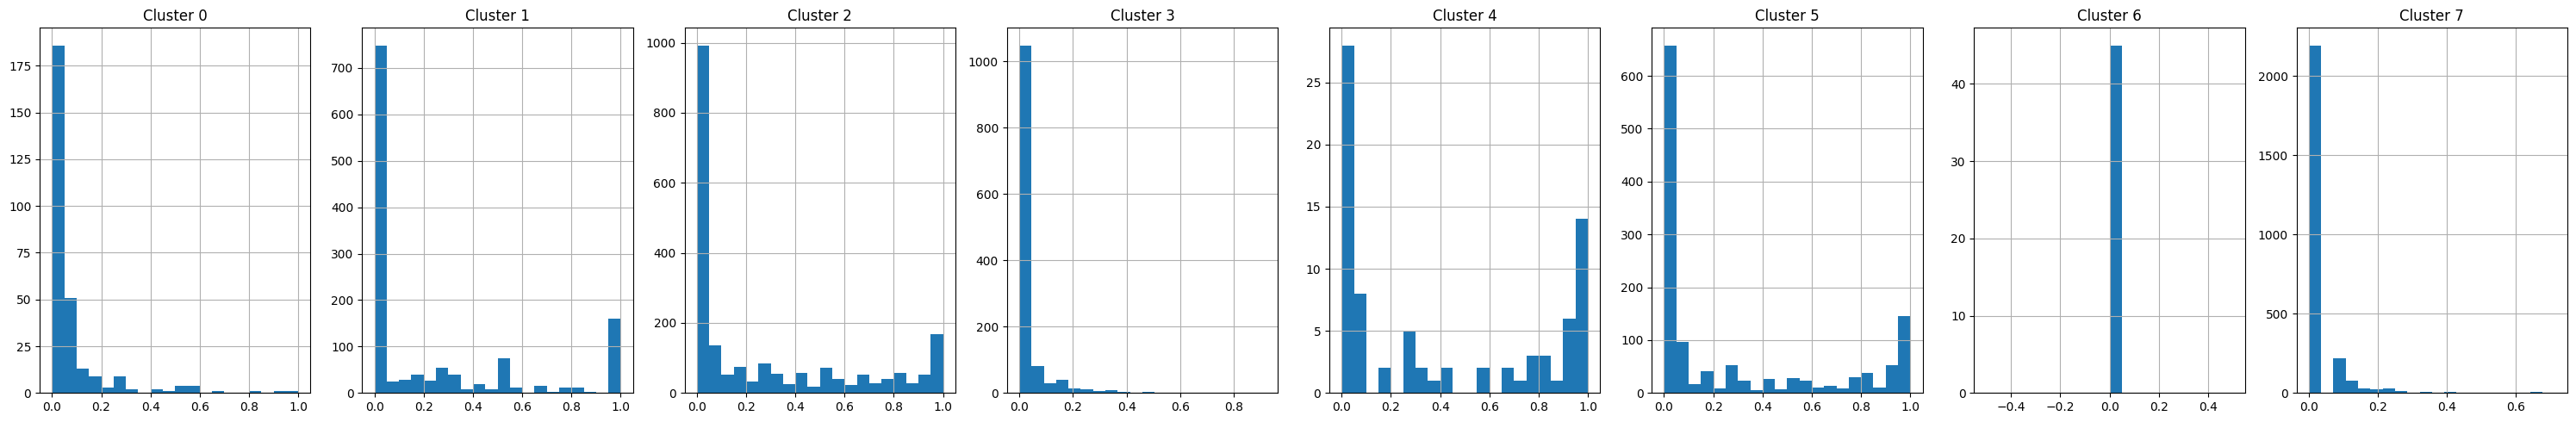

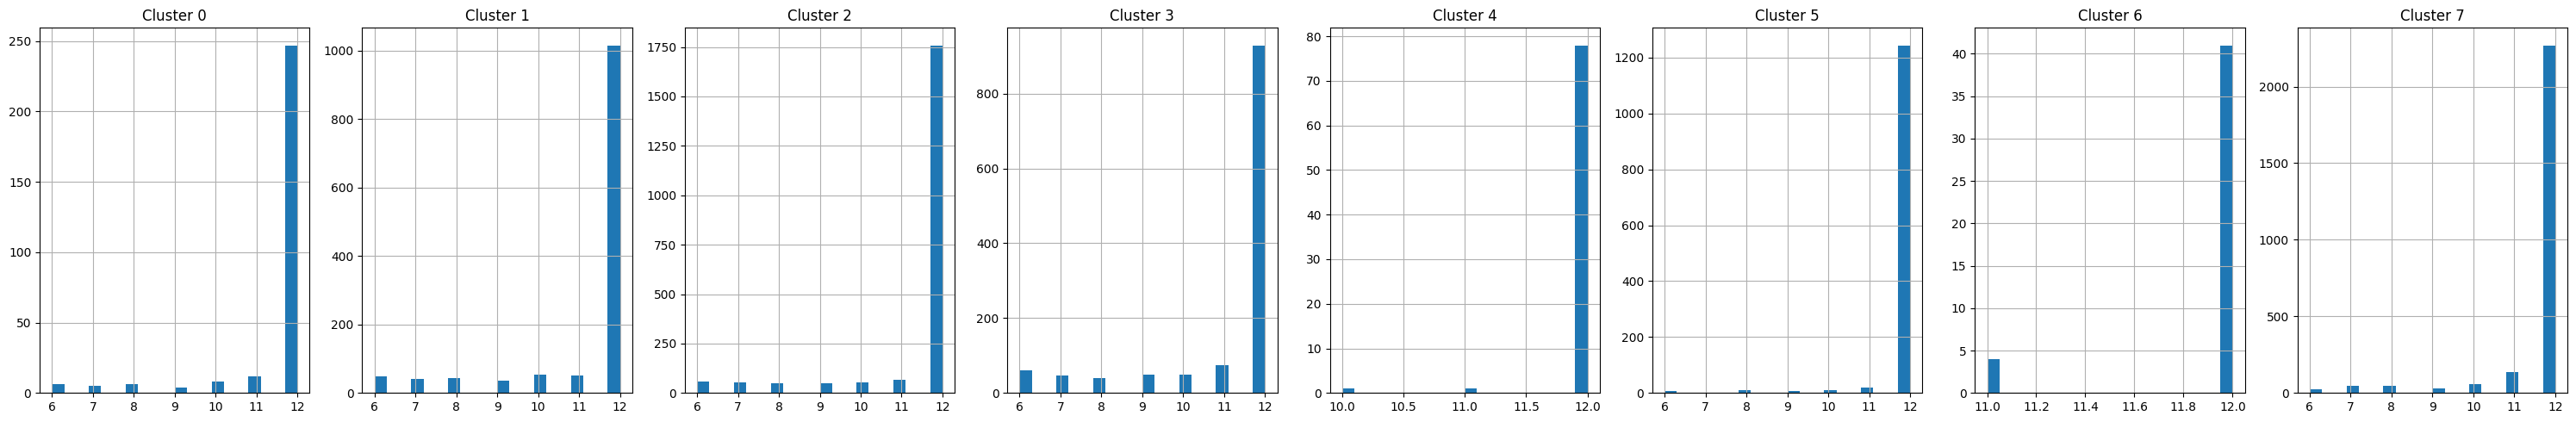

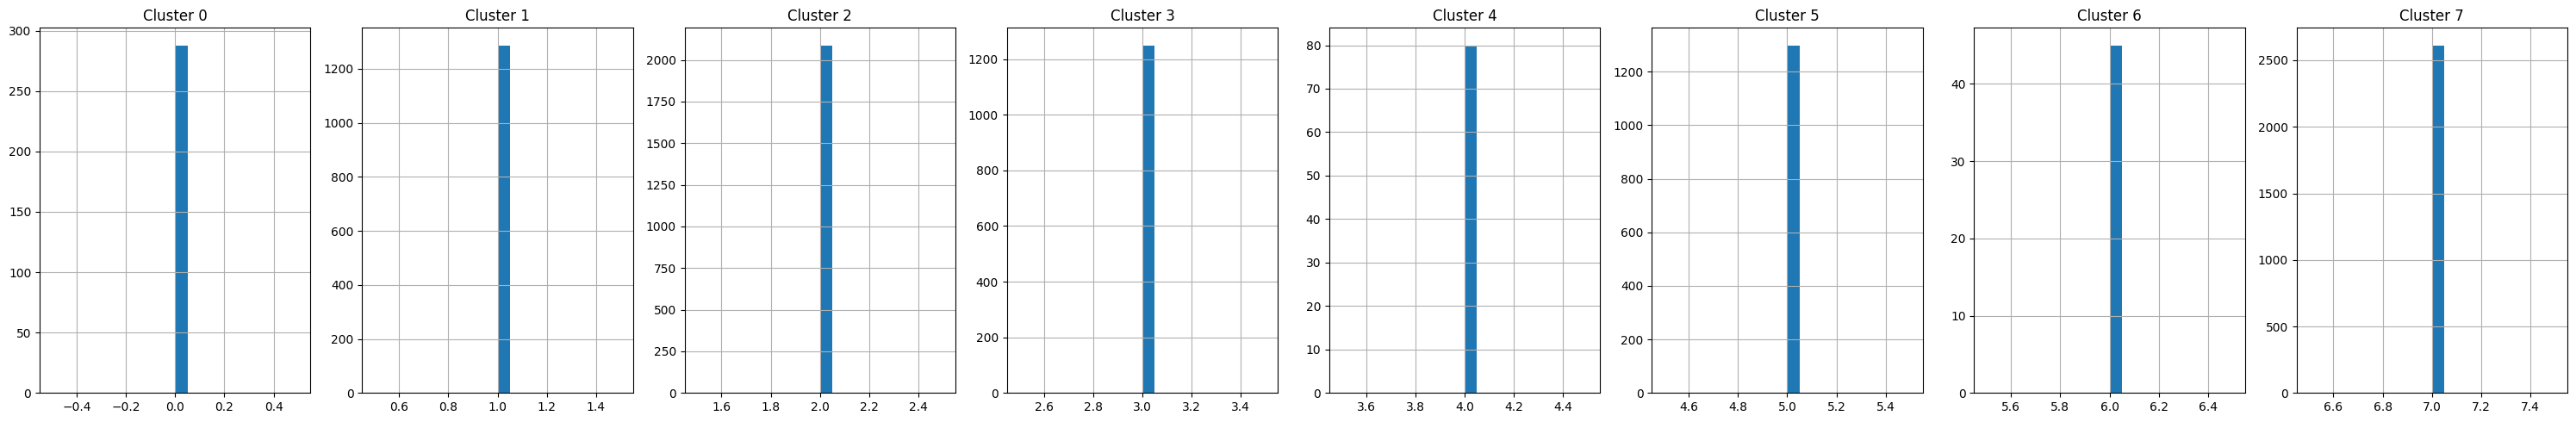

In [21]:
# Plot histogram of clusters
for i in df_clustered:
  plt.figure(figsize=(30,5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = df_clustered[df_clustered['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('Cluster ' + str(j))
    plt.tight_layout()
plt.show()


## **Apply PCA**

We use PCA to reduce the dimensionality of the dataset while maintaining maximum variance. From prior exploration, we know that our dataset contains correlations between features, thus PCA will maintain the correlation while reducing the dimensionality.

In [22]:
# Obtain Principal Components while maintaining 95% of the original variance
pca = PCA(n_components=0.95)
principal_comp = pca.fit_transform(df_scaled)

# View number of components (Before and After)
print(f"Number of components before PCA: {df_scaled.shape[1]}")
print(f"Number of components after PCA: {principal_comp.shape[1]}")

Number of components before PCA: 17
Number of components after PCA: 12


After applying PCA we reduced the number of features from 17 down to 12 while maintaining 95% variance

In [23]:
# Create new dataframe
pca_df = pd.DataFrame(principal_comp)

# Preview
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.682220,-1.076451,-0.488507,0.665552,-0.018225,-0.050629,-0.829144,-0.039303,0.115340,0.077774,-0.235181,0.053886
1,-1.138295,2.506477,-0.601212,-0.120437,-0.605803,1.136841,0.374507,0.132411,0.687878,0.777671,-0.871437,0.601855
2,0.969684,-0.383520,-0.102371,1.209266,2.172584,0.217222,1.573258,-0.169548,-0.883727,0.001939,-0.761725,-0.684204
3,-0.873628,0.043166,-1.460167,1.151980,-0.295632,0.123689,0.280759,-0.559099,-0.146564,-0.393144,0.744858,-0.149804
4,-1.599434,-0.688581,-0.365094,0.990232,0.487039,-0.075060,-0.707923,0.208399,0.584619,0.121734,-0.455097,0.106243


In [24]:
# Concat cluster labels into PCA dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

# Preview
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,cluster
0,-1.682220,-1.076451,-0.488507,0.665552,-0.018225,-0.050629,-0.829144,-0.039303,0.115340,0.077774,-0.235181,0.053886,7
1,-1.138295,2.506477,-0.601212,-0.120437,-0.605803,1.136841,0.374507,0.132411,0.687878,0.777671,-0.871437,0.601855,3
2,0.969684,-0.383520,-0.102371,1.209266,2.172584,0.217222,1.573258,-0.169548,-0.883727,0.001939,-0.761725,-0.684204,5
3,-0.873628,0.043166,-1.460167,1.151980,-0.295632,0.123689,0.280759,-0.559099,-0.146564,-0.393144,0.744858,-0.149804,7
4,-1.599434,-0.688581,-0.365094,0.990232,0.487039,-0.075060,-0.707923,0.208399,0.584619,0.121734,-0.455097,0.106243,7


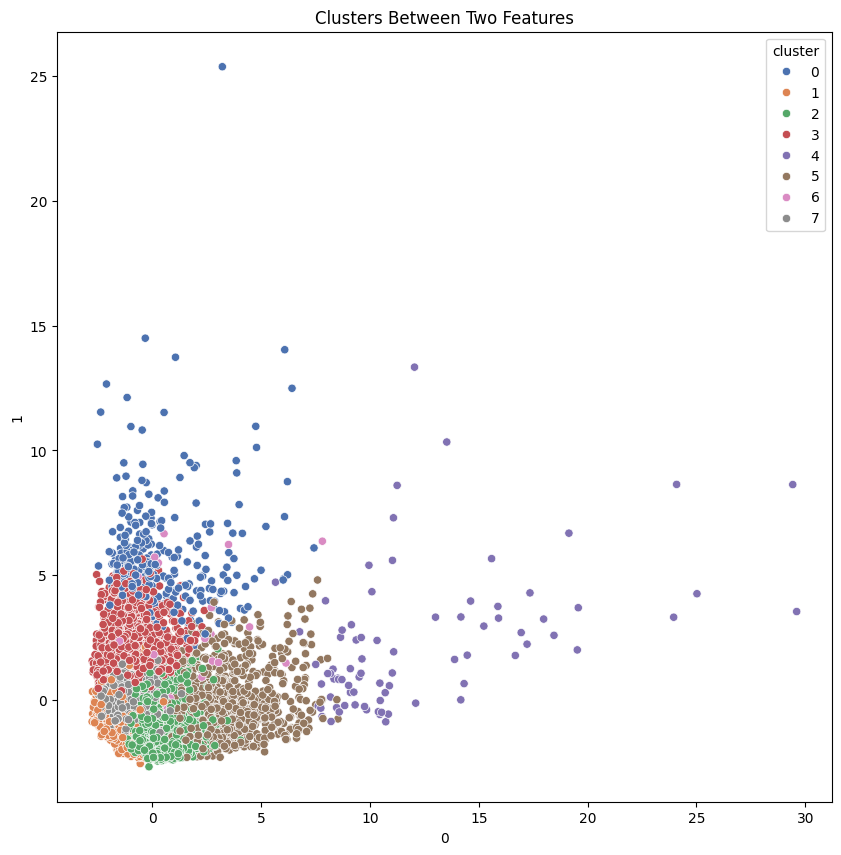

In [25]:
# Plot data to visualize clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x=0, y=1, hue='cluster', data=pca_df, palette='deep')
plt.title('Clusters Between Two Features')
plt.show()

## **Build Neural Network**

In [26]:
# Import Tensorflow packages
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [27]:
# Input layer
input_df = Input(shape = (17,))

# First Dense layer (
x = Dense(16, activation = 'relu')(input_df)

# Second Dense layer
x = Dense(500, activation = 'relu', kernel_initializer ='glorot_uniform')(x)

# Third Dense layer )
x = Dense(2000, activation = 'relu', kernel_initializer ='glorot_uniform')(x)

# Encoded layer
encoded = Dense(10, activation = 'relu', kernel_initializer ='glorot_uniform')(x)

# First decoder layer
x = Dense(2000, activation = 'relu', kernel_initializer ='glorot_uniform')(x)

# Second decoder layer
x = Dense(500, activation = 'relu', kernel_initializer ='glorot_uniform')(x)

# Decoded output layer
decoded = Dense(17, kernel_initializer ='glorot_uniform')(x)

# Autoencoder model
autoencoder = Model(input_df, decoded)

# Encoder model
encoder = Model(input_df, encoded)

# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Autoencoder summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │         8,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2000)           │     1,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2000)           │     4,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │     1,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 17)             │         8,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,021,805 (22.97 MB)

 Trainable params: 6,021,805 (22.97 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Fit scaled dataset
autoencoder.fit(df_scaled, df_scaled, epochs=25, verbose=1 ,batch_size=100)

Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.3368
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0843
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0628
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0470
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0402
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0488
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0290
Epoch 8/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0285
Epoch 9/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0252
Epoch 10/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0330
Epoch 11/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0230
Epoch 12/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0559
Epoch 13/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0314
Epoch 14/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0284
Epoch 15/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0233
Epoch 16/25
90/90 

In [29]:
# Use the trained encoder model to get the compressed representation of the scaled data
encoded_data = encoder.predict(df_scaled)

# Shape of the encoded data
encoded_data.shape

280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


(8950, 10)

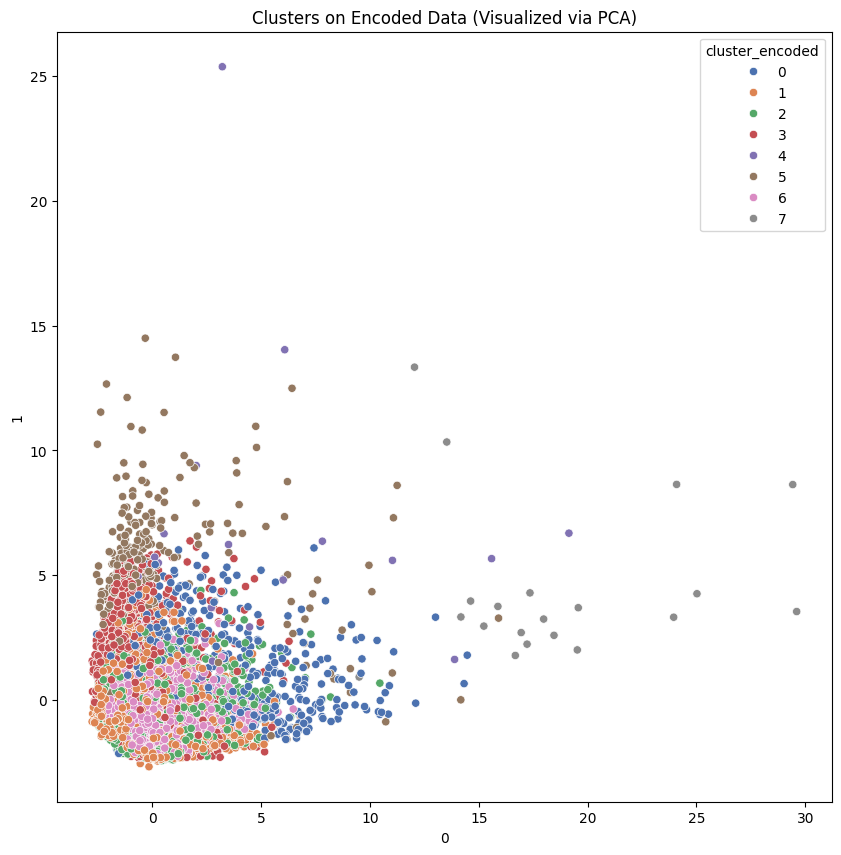

In [30]:
# Apply KMeans clustering
kmeans_encoded = KMeans(n_clusters=8, random_state=42)
kmeans_encoded.fit(encoded_data)

# Get the cluster labels from the clustering on the encoded data
labels_encoded = kmeans_encoded.labels_

# You can now analyze these new clusters formed on the lower-dimensional data
df_clustered_encoded = pd.concat([df, pd.DataFrame({'cluster_encoded': labels_encoded})], axis=1)

# Visualize these clusters
pca_df_encoded = pd.concat([pca_df, pd.DataFrame({'cluster_encoded': labels_encoded})], axis=1)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=0, y=1, hue='cluster_encoded', data=pca_df_encoded, palette='deep')
plt.title('Clusters on Encoded Data (Visualized via PCA)')
plt.show()

In [34]:
# Calculate the mean of original features for each encoded cluster
cluster_profiles_encoded = df_clustered_encoded.groupby('cluster_encoded').mean()

# Display the profiles
cluster_profiles_encoded

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_encoded,,,,,,,,,,,,,,,,,
0,3911.864542,0.986799,4480.514720,3238.070097,1242.444623,1911.362669,0.822057,0.679802,0.536894,0.250756,6.725061,61.128954,7919.829684,4076.415952,1362.385684,0.126877,11.669100
1,1524.419728,0.890534,920.969353,442.285761,478.753240,1006.896925,0.556759,0.294119,0.335185,0.117219,2.417385,15.458333,4675.235476,1616.801027,644.568605,0.315115,10.545259
2,827.633521,0.682973,834.170325,538.871604,295.687971,372.927433,0.512654,0.178340,0.404080,0.078752,1.582339,12.022434,4218.095779,1264.774191,575.897146,0.249604,11.848210
3,2796.561661,0.839978,449.634957,247.866816,201.818170,3443.533351,0.271672,0.121143,0.204098,0.400804,10.491354,8.096542,5577.484936,3019.598321,1483.959411,0.094569,10.883285
4,6817.420822,0.949091,4722.726400,2337.932400,2384.794000,4200.857532,0.581818,0.143939,0.494848,0.174545,9.520000,31.960000,10130.000000,10304.454151,28731.218027,0.036667,11.920000
5,5233.169431,0.957103,1446.949794,632.510617,816.998848,6570.630881,0.329257,0.181903,0.242767,0.617932,23.872428,20.176955,8713.580247,7365.190965,3554.941167,0.100269,11.341564
6,1238.165523,0.962260,681.046769,347.169646,334.151688,408.316719,0.466751,0.147577,0.368477,0.084454,1.529730,11.124324,3708.380736,1050.113359,589.981804,0.064400,11.778378
7,5807.286560,0.995000,27701.578500,21486.072500,6215.506000,1954.848674,0.949167,0.852500,0.760833,0.095833,4.350000,161.350000,14545.000000,25951.309665,2886.954548,0.450947,11.900000


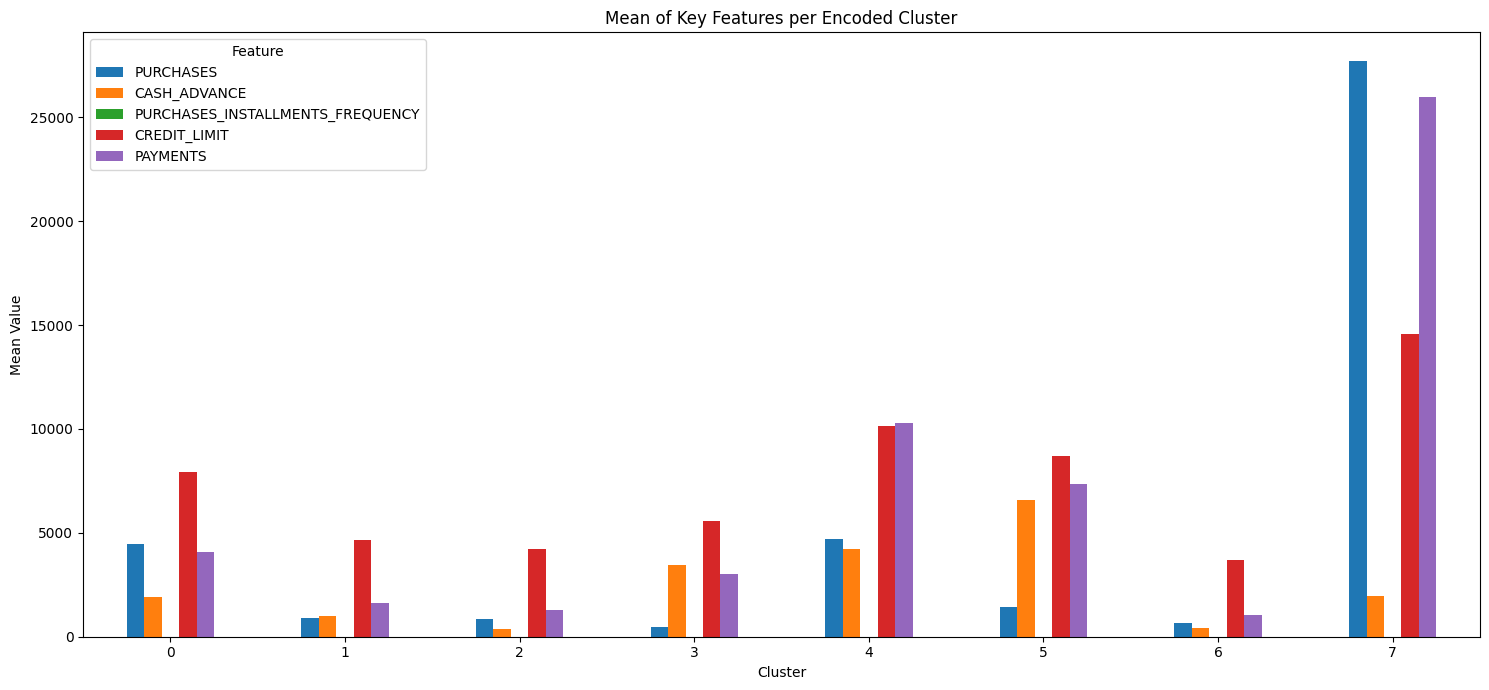

In [35]:
# Plots
features_to_plot = ['PURCHASES', 'CASH_ADVANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS']
cluster_profiles_encoded[features_to_plot].plot(kind='bar', figsize=(15, 7))
plt.title('Mean of Key Features per Encoded Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

## **Strategy Based On Results**

### **Cluater 0**

**Balanced Spenders / Everyday Users**

These customers show consistent, moderate activity across general purchases and payments. They typically operate within an average credit limit, indicating responsible and regular card usage. Marketing should focus on enhancing their daily spending experience and reinforcing loyalty.

### **Clsuter 1**

**Low Engagement / Dormant Users**


Characterized by very minimal activity across all credit features, this group suggests either new accounts that haven't fully onboarded or existing accounts that have become inactive. Their low engagement indicates a need for re-activation or a fundamental understanding of credit card benefits. The primary goal for this segment is to incentivize initial or renewed card usage. Simple, direct re-engagement offers are crucial to encourage their first step.

### **Cluster 2**

**Minimal Activity Users**


This cluster exhibits the lowest levels of credit card usage across all metrics, even less than those labeled "low engagement." They likely possess the card for occasional, unforeseen needs or have very limited credit requirements. Marketing efforts should acknowledge their infrequent use while subtly reminding them of the card's convenience for essential transactions. Avoid aggressive promotions that could overwhelm or alienate these highly passive users.

### **Cluster 3**

**Budgeted Installment Shoppers**


These users frequently leverage installment plans for their purchases, making regular payments but operating within a relatively low credit limit. Their behavior points to a preference for managing larger expenses through structured payments. Marketing should emphasize flexible payment options and showcase partnerships with retailers offering attractive installment plans. Encourage continued responsible spending through installment-focused rewards.

### **Cluster 4**

**Credit Line Explorers**


With high credit limits and substantial payments, this group actively utilizes their credit for both purchases and cash advances. They manage large financial flows, suggesting a higher income bracket or robust creditworthiness. Marketing should focus on premium benefits and exclusive access to financial products that align with their capacity for significant transactions. Offer personalized wealth management or high-tier credit card upgrades.

### **Cluster 5**

**Cash Advance Users**

This distinctive group primarily uses their credit for cash advances, indicating a need for immediate liquidity, though their overall purchases are moderate. They often utilize their credit limit for direct cash access rather than traditional spending. Marketing should sensitively introduce alternative, potentially lower-cost financing options like personal loans or lines of credit. Provide resources for financial planning to help manage their cash flow needs more effectively.

### **Cluster 6**

**Infrequent Small Spenders**

Similar to other low-activity groups, these customers make very infrequent, small purchases and equally small payments. Their engagement is consistently low, but distinct from dormant users, they do show sporadic, albeit minimal, transactional activity. Marketing should focus on simplifying their occasional transactions and highlighting convenience features. Gentle reminders of their card's utility for quick, everyday needs are more effective than high-value incentives.

### **Cluster 7**

**Premium Spenders / High-Value Purchasers**

This is the top-tier segment, characterized by exceptionally high purchase volumes, credit limits, and corresponding payment amounts. They are highly active and likely derive significant value from their credit card. Marketing should provide exclusive, bespoke experiences, personalized concierge services, and invitations to high-end events. Prioritize maintaining their high engagement through tailored rewards programs and direct relationship management.